#  ESG Analysis on Aerospace Industry

# Intro

This project will focus into the financial health and ESG performance of major aerospace industry players over the period from 2020 to 2023, utilizing Python packages such as yfinance, pandas, numpy, matplotlib, and seaborn to extract and evaluate comprehensive accounting data.

***Summary :***



1.   Financial Datas
2.   Performance and Ratio Analysis
3.   Forecasting
3.   ESG Performance



The 4 companies we chose are Airbus; Boeing; Embraer and Bombardier (Even if Bombardier sold its civil fleet to Airbus in 2021, the choice is relevant as Bombardier is the first private/business plane provider). All those companies are referenced under the ***SIC code : 3721.***

# I. Financial Datas & relevant infos

## A. Income statement


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
companies = {
    "Airbus": "AIR.PA",
    "Boeing": "BA",
    "Embraer": "ERJ",
    "Bombardier": "BBD-B.TO"
}
sic_code="3721"

In [3]:
income_statements=pd.DataFrame()

**ESG Relevant data**:  To get relevant indicators and financial metrics for our esg analysis, the code will use only the most relevant indicators on the income  statement, that's why we create a esg condition inside the **loop that will only iterate the esg project focused indicators for the financial analysis**

We can create also our first ratios inside the esg condition with the $ \text{NI margin}=\frac{\text{Net Income}}{\text{Total Revenue}}$ and the $ \text{R\&D to Revenue ratio}=\frac{\text{R\&D}}{\text{Total Revenue}} $, those indicators will be added to our pandas table.

The last step ensure that each row is correctly labeled with the company name and corresponding year
then the code finally concatenates the income statements relevant datas with the indicators.

In [4]:
for company, ticker in companies.items():
    ticker_data=yf.Ticker(ticker)
    financials=ticker_data.financials.transpose()


    financials['Company']=company
    financials['Year']=financials.index.year


    esg_relevant_data=financials[['Total Revenue', 'Cost Of Revenue', 'Gross Profit',
                                    'Research And Development', 'Operating Income', 'Net Income']].copy()
    #esg_relevant_data['Net Income Margin']=esg_relevant_data['Net Income'] / esg_relevant_data['Total Revenue']
    #esg_relevant_data['R&D to Revenue Ratio']=esg_relevant_data['Research And Development'] / esg_relevant_data['Total Revenue']


    esg_relevant_data['Company']=company
    esg_relevant_data['Year']=esg_relevant_data.index.year


    income_statements=pd.concat([income_statements, esg_relevant_data])

In [5]:
income_statements['Index']=income_statements['Company'] + " " + income_statements['Year'].astype(str)
income_statements.set_index('Index', inplace=True)

In [6]:
print(income_statements[['Total Revenue', 	'Cost Of Revenue', 	'Gross Profit', 	'Research And Development',	'Operating Income', 	'Net Income']] )

                 Total Revenue Cost Of Revenue   Gross Profit  \
Index                                                           
Airbus 2023      65446000000.0   55402000000.0  10044000000.0   
Airbus 2022      58763000000.0   48192000000.0  10571000000.0   
Airbus 2021      52149000000.0   42518000000.0   9631000000.0   
Airbus 2020      49912000000.0   44250000000.0   5662000000.0   
Boeing 2023      77794000000.0   70070000000.0   7724000000.0   
Boeing 2022      66608000000.0   63078000000.0   3530000000.0   
Boeing 2021      62286000000.0   59237000000.0   3049000000.0   
Boeing 2020      58158000000.0   63843000000.0  -5685000000.0   
Embraer 2023      5268500000.0    4358900000.0    909600000.0   
Embraer 2022      4540400000.0    3628200000.0    912200000.0   
Embraer 2021      4197200000.0    3537600000.0    659600000.0   
Embraer 2020      3771100000.0    3293500000.0    477600000.0   
Bombardier 2023   8046000000.0    6415000000.0   1631000000.0   
Bombardier 2022   6913000

## B. Balance SHeet

In [7]:
balancesheets = pd.DataFrame()

In [8]:
for company, ticker in companies.items():
    ticker_data = yf.Ticker(ticker)
    balancesheet = ticker_data.balancesheet.transpose()

    balancesheet['Company'] = company
    balancesheet['Year'] = balancesheet.index.year

    relevant_data = balancesheet[['Inventory', 'Current Assets', 'Current Liabilities', 'Total Assets','Total Liabilities Net Minority Interest', 'Stockholders Equity', 'Long Term Debt', 'Total Debt']].copy()

    relevant_data['Company'] = company
    relevant_data['Year'] = relevant_data.index.year


    balancesheets = pd.concat([balancesheets, relevant_data])

balancesheets['Index'] = balancesheets['Company'] + " " + balancesheets['Year'].astype(str)
balancesheets.set_index('Index', inplace=True)
print(balancesheets)

                     Inventory  Current Assets Current Liabilities  \
Index                                                                
Airbus 2023      27740000000.0   64001000000.0       53750000000.0   
Airbus 2022      27157000000.0   63002000000.0       52595000000.0   
Airbus 2021      25166000000.0   55694000000.0       47807000000.0   
Airbus 2020      27286000000.0   58400000000.0       49471000000.0   
Boeing 2023      79741000000.0  109275000000.0       95827000000.0   
Boeing 2022      78151000000.0  109523000000.0       90052000000.0   
Boeing 2021      78823000000.0  108666000000.0       81992000000.0   
Boeing 2020      81715000000.0  121642000000.0       87280000000.0   
Embraer 2023      2610600000.0    6055400000.0        3665600000.0   
Embraer 2022      2295200000.0    5756600000.0        3217300000.0   
Embraer 2021      1955200000.0    5875800000.0        2828800000.0   
Embraer 2020      2390100000.0    6115700000.0        2428700000.0   
Bombardier 2023   37

## C.Cash Flow

In [9]:
relevant_cash_flows = pd.DataFrame()

In [10]:
for company, ticker in companies.items():
    ticker_data = yf.Ticker(ticker)
    cashflow = ticker_data.cashflow.transpose()

    cashflow['Company'] = company
    cashflow['Year'] = cashflow.index.year

    cashflow = cashflow[cashflow['Year'] >= (pd.to_datetime("today").year - 4)]

    relevant_data = cashflow[['Operating Cash Flow', 'Investing Cash Flow','Financing Cash Flow','End Cash Position','Capital Expenditure','Free Cash Flow',
]].copy()

    relevant_data['Company'] = company
    relevant_data['Year'] = cashflow['Year']
    relevant_cash_flows = pd.concat([relevant_cash_flows, relevant_data])

relevant_cash_flows['Index'] = relevant_cash_flows['Company'] + " " + relevant_cash_flows['Year'].astype(str)
relevant_cash_flows.set_index('Index', inplace=True)

print(relevant_cash_flows) 

                Operating Cash Flow Investing Cash Flow Financing Cash Flow  \
Index                                                                         
Airbus 2023            6255000000.0       -4128000000.0       -1276000000.0   
Airbus 2022            6288000000.0       -3113000000.0       -2115000000.0   
Airbus 2021            4639000000.0       -2719000000.0       -2179000000.0   
Airbus 2020           -5420000000.0        4126000000.0        6833000000.0   
Boeing 2023            5960000000.0       -2437000000.0       -5487000000.0   
Boeing 2022            3512000000.0        4370000000.0       -1266000000.0   
Boeing 2021           -3416000000.0        9324000000.0       -5600000000.0   
Boeing 2020          -18410000000.0      -18366000000.0       34955000000.0   
Embraer 2023            617000000.0        -447600000.0        -348700000.0   
Embraer 2022            751300000.0        -109500000.0        -669200000.0   
Embraer 2021            515300000.0        -13160000

## D. Consolidated Financial Table

To manipulate the datas in order to compute the ratios in the next part, the code creates a consolidated table with all the financial statements  computed previously.

In [11]:
financial_data = pd.concat([income_statements, relevant_cash_flows, balancesheets], axis=1, join='inner')
print("\nCombined Financial Data:")
print(financial_data)


Combined Financial Data:
                 Total Revenue Cost Of Revenue   Gross Profit  \
Index                                                           
Airbus 2023      65446000000.0   55402000000.0  10044000000.0   
Airbus 2022      58763000000.0   48192000000.0  10571000000.0   
Airbus 2021      52149000000.0   42518000000.0   9631000000.0   
Airbus 2020      49912000000.0   44250000000.0   5662000000.0   
Boeing 2023      77794000000.0   70070000000.0   7724000000.0   
Boeing 2022      66608000000.0   63078000000.0   3530000000.0   
Boeing 2021      62286000000.0   59237000000.0   3049000000.0   
Boeing 2020      58158000000.0   63843000000.0  -5685000000.0   
Embraer 2023      5268500000.0    4358900000.0    909600000.0   
Embraer 2022      4540400000.0    3628200000.0    912200000.0   
Embraer 2021      4197200000.0    3537600000.0    659600000.0   
Embraer 2020      3771100000.0    3293500000.0    477600000.0   
Bombardier 2023   8046000000.0    6415000000.0   1631000000.0   

# II. Performance and Ratio Analysis

In this part we will compute **different financial metrics** using the financial datas we computed before, we will focus on the most relevant ones for the ESG Analysis that follows, that include the classical ratios we use to draw conclusion on a company's financial health.

## A. Profitability Analysis

In [12]:
Profitability_ratios = pd.concat([income_statements, relevant_cash_flows, balancesheets], axis=1, join='inner')
Profitability_ratios['ROA'] = financial_data['Net Income'] / financial_data['Total Assets']
Profitability_ratios['ROE'] = financial_data['Net Income'] / financial_data['Stockholders Equity']
Profitability_ratios['Gross Margin Ratio'] = financial_data['Gross Profit'] / financial_data['Total Revenue']
Profitability_ratios['Operating Margin Ratio'] = financial_data['Operating Income'] / financial_data['Total Revenue']
Profitability_ratios['Net Profit Margin'] = financial_data['Net Income'] / financial_data['Total Revenue']
Profitability_ratios = Profitability_ratios.loc[:, ~Profitability_ratios.columns.duplicated()]#this wll delete the duplicate column if there is any

print ("All the ratios are in % : \n" )
print(Profitability_ratios[['ROE', 'ROA', 'Gross Margin Ratio', 'Operating Margin Ratio', 'Net Profit Margin']])

All the ratios are in % : 

                      ROE       ROA Gross Margin Ratio Operating Margin Ratio  \
Index                                                                           
Airbus 2023      0.214128  0.031875            0.15347               0.065184   
Airbus 2022      0.327954   0.03663           0.179892               0.089376   
Airbus 2021      0.445067  0.039357           0.184682               0.092677   
Airbus 2020     -0.175795 -0.010291            0.11344               0.013303   
Boeing 2023      0.128939 -0.016218           0.099288              -0.010554   
Boeing 2022       0.31071 -0.035996           0.052997              -0.052681   
Boeing 2021      0.280152 -0.030328           0.048952              -0.053897   
Boeing 2020      0.651944 -0.078489          -0.097751              -0.223151   
Embraer 2023     0.058855   0.01521           0.172649               0.046465   
Embraer 2022     -0.07221  -0.01828           0.200907               0.048476   


The most important ratio among these is the ROE, which reflects whether or not a company is making a profit.

**Comparison of the Profitability ratios with graphs**:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

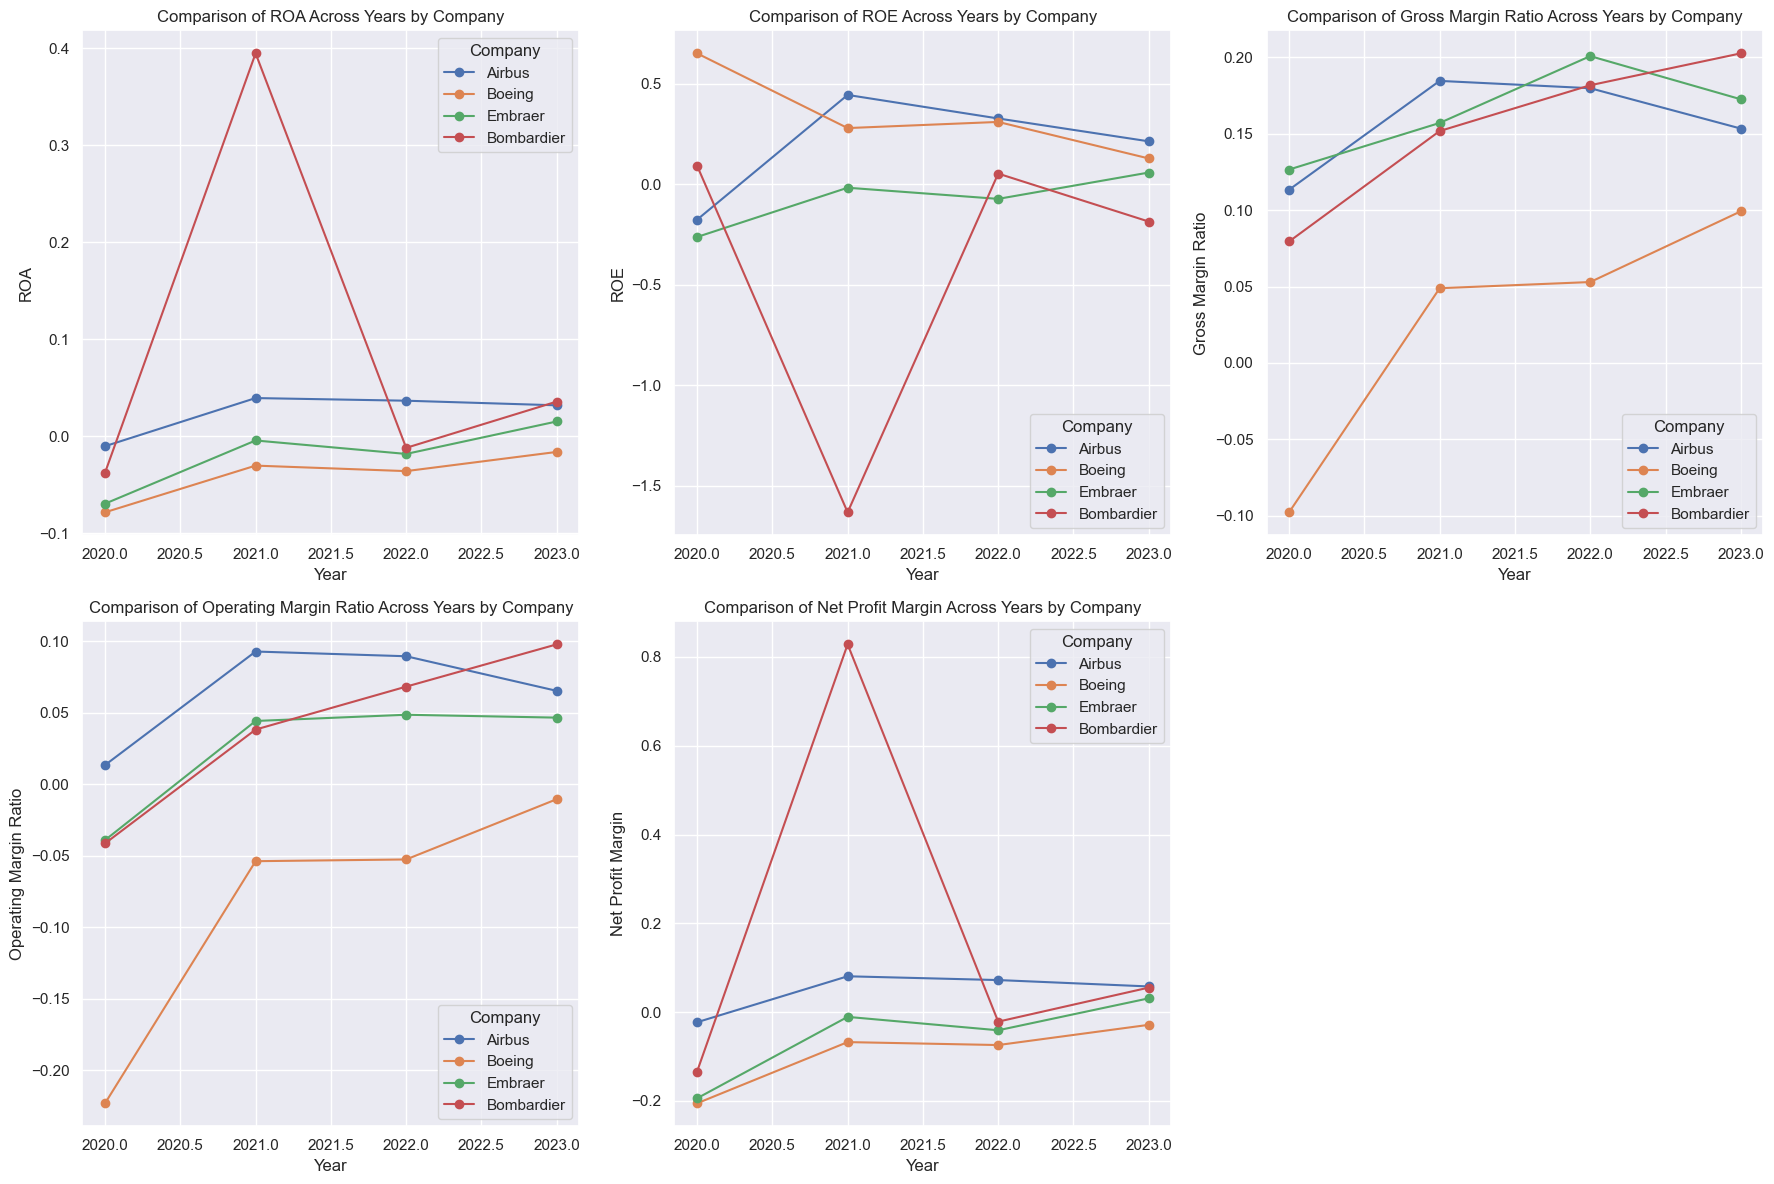

In [14]:
sns.set_theme(style='darkgrid')

plot_profitability_ratios = ['ROA', 'ROE', 'Gross Margin Ratio', 'Operating Margin Ratio', 'Net Profit Margin']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, ratio in enumerate(plot_profitability_ratios):
    for company in Profitability_ratios['Company'].drop_duplicates().values:
        subset = Profitability_ratios[Profitability_ratios['Company'] == company]
        axes[i].plot(subset['Year'], subset[ratio], marker='o', linestyle='-', label=company)

    axes[i].set_title(f'Comparison of {ratio} Across Years by Company')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(ratio)
    axes[i].legend(title='Company')
    axes[i].grid(True)


plt.tight_layout()#set automatically space btween graphs

if len(plot_profitability_ratios) < len(axes):
    axes[-1].axis('off')

plt.show()

### Conclusion on time series plot for profitability ratio

The first thing we see is that bombardier has distinctly different curves compared to other companies, which can be attributed to the sale of its commercial aircraft business to Airbus in 2021. This graph shows significant variations in the ratios, justified by this transaction as well as the impact of COVID-19. The other companies display more homogeneous and correlated behavior.

## B. Liquidity and Solvency Analysis

The code will compute separatly the **Liquidity** from the **Solvency** one.

First, we need to calculate for each company the following liquidity ratios, which will enable us to do the liquidity analysis:

- **Current ratio**:
  $$
  \text{Current ratio} = \frac{\text{Current assets}}{\text{Current liabilities}}
  $$

- **Quick ratio**:
  $$
  \text{Quick ratio} = \frac{(\text{Current assets} - \text{Inventories})}{\text{Current liabilities}}
  $$

- **Days sales outstanding (DSO)**:
  $$
  \text{DSO} = \frac{\text{Accounts receivable}}{\text{Total credit sales}} \times \text{Number of days in sales}
  $$


In [15]:
Liquidity_ratios = pd.DataFrame(index=balancesheets.index)
Liquidity_ratios['Current Ratio'] = balancesheets['Current Assets'] / balancesheets['Current Liabilities']
Liquidity_ratios['Quick Ratio'] = (balancesheets['Current Assets'] - balancesheets.get('Inventory', 0)) / balancesheets['Current Liabilities']
Liquidity_ratios['Company'] = balancesheets['Company']
Liquidity_ratios['Year'] = balancesheets['Year']



Solvency_ratios = pd.DataFrame(index=balancesheets.index)
Solvency_ratios['Debt to Equity Ratio'] = balancesheets['Total Debt'] / balancesheets['Stockholders Equity']
Solvency_ratios['Debt to Assets Ratio'] = balancesheets['Total Debt'] / balancesheets['Total Assets']
Solvency_ratios['Company'] = balancesheets['Company']
Solvency_ratios['Year'] = balancesheets['Year']

print ("All the ratios are in % : \n" )

print("Liquidity ratios : \n ")
print(Liquidity_ratios[['Current Ratio','Quick Ratio']])


All the ratios are in % : 

Liquidity ratios : 
 
                Current Ratio Quick Ratio
Index                                    
Airbus 2023          1.190716    0.674623
Airbus 2022          1.197871    0.681529
Airbus 2021          1.164976    0.638568
Airbus 2020           1.18049    0.628934
Boeing 2023          1.140336    0.308201
Boeing 2022           1.21622    0.348376
Boeing 2021          1.325324    0.363975
Boeing 2020          1.393698    0.457459
Embraer 2023         1.651953    0.939764
Embraer 2022         1.789264    1.075871
Embraer 2021         2.077135    1.385959
Embraer 2020         2.518096    1.533989
Bombardier 2023      0.999326    0.364769
Bombardier 2022      1.027221    0.416222
Bombardier 2021      1.149539    0.469589
Bombardier 2020      0.989243     0.77233


To plot the time series, we use again the previous method, by iterating in a for loop the different liquidity ratios in the subplot grid

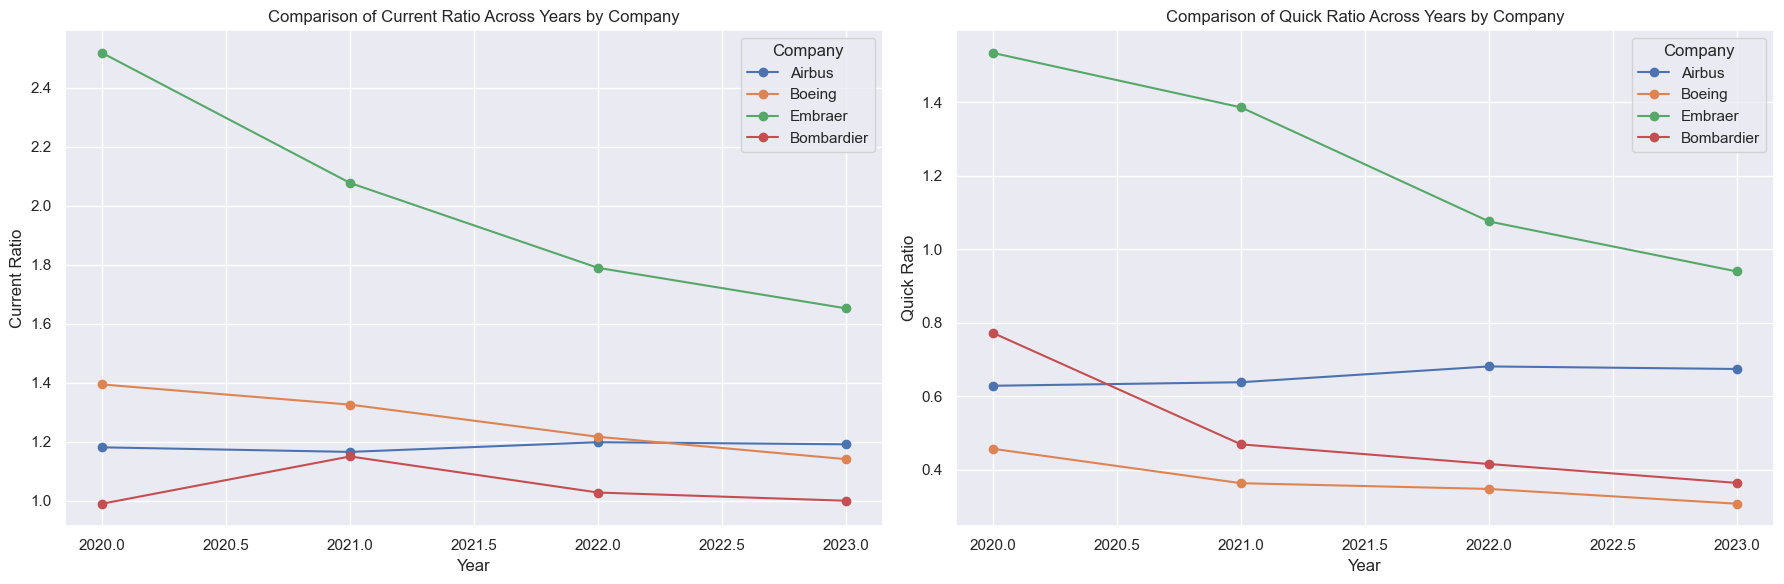

In [16]:
sns.set_theme(style='darkgrid')

plot_liquidity_ratios = ['Current Ratio', 'Quick Ratio']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  
axes = axes.flatten()

for i, ratio in enumerate(plot_liquidity_ratios):
    for company in Liquidity_ratios['Company'].drop_duplicates().values:
        subset = Liquidity_ratios[Liquidity_ratios['Company'] == company]
        axes[i].plot(subset['Year'], subset[ratio], marker='o', linestyle='-', label=company)
    axes[i].set_title(f'Comparison of {ratio} Across Years by Company')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(ratio)
    axes[i].legend(title='Company')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [17]:
print("Solvency ratios : \n")
print(Solvency_ratios[['Debt to Equity Ratio','Debt to Assets Ratio']])

Solvency ratios : 

                Debt to Equity Ratio Debt to Assets Ratio
Index                                                    
Airbus 2023                 0.639842             0.095246
Airbus 2022                 0.848108             0.094727
Airbus 2021                 1.422037             0.125749
Airbus 2020                 2.423894             0.141896
Boeing 2023                -3.052457              0.38393
Boeing 2022                -3.606183             0.417775
Boeing 2021                -3.891593             0.421286
Boeing 2020                -3.486078             0.419697
Embraer 2023                1.070303             0.276596
Embraer 2022                1.275248             0.322833
Embraer 2021                1.533303             0.402826
Embraer 2020                1.614619             0.429127
Bombardier 2023            -2.332363             0.450072
Bombardier 2022            -2.165098             0.485232
Bombardier 2021            -2.281321               0

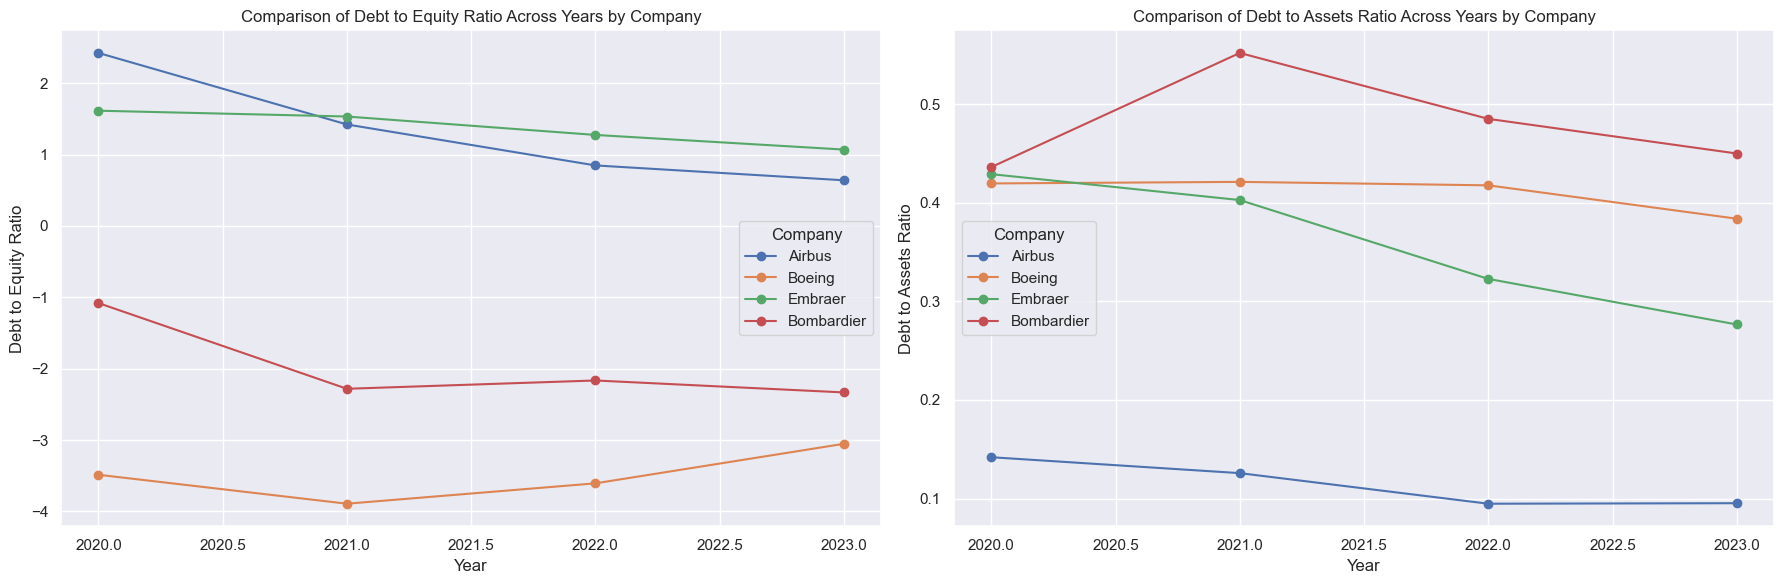

In [18]:
plot_solvency_ratios = ['Debt to Equity Ratio', 'Debt to Assets Ratio']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()


for i, ratio in enumerate(plot_solvency_ratios):
    for company in Solvency_ratios['Company'].drop_duplicates().values:
        subset = Solvency_ratios[Solvency_ratios['Company'] == company]
        axes[i].plot(subset['Year'], subset[ratio], marker='o', linestyle='-', label=company)
    axes[i].set_title(f'Comparison of {ratio} Across Years by Company')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(ratio)
    axes[i].legend(title='Company')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Conclusion on Financial Analysis
 So, according to the graphs, based on the simulated trends for the financial ratios from 2015 to 2020 for Airbus, Boeing, Embraer, and Bombardier we see some trends in these ratios across the years for each company. Airbus shows improvement in liquidity (current ratio),  this could be due to effective management of current assets or reductions in short-term liabilities.  An increased focus on cash management and quicker inventory turnover could also contribute.   
  
Airbus might have prioritized debt reduction through refinancing strategies or by allocating more earnings to pay off liabilities, potentially in response to industry norms or economic conditions because it has reduction in debt but Airbus has a slight decline in equity financing.  
  
Boeing's enhancement in liquidity, particularly during a period of intense scrutiny such as **the 737 MAX crisis**, might reflect a strategic initiative to bolster short-term financial health, possibly through asset liquidation or improving operational efficiencies. Boeing has an increase in the debt to assets ratio due to challenging period and a decrease in the equity ratio.  

Embraer displays relatively stable but slightly worsening trends in liquidity and equity due to competitive pressure , with a small improvement in lowering debt.  

Bombardier stands out with improvements in both solvency ratios, possibly due to selling off less profitable divisions (like the sale of their commercial aviation segment) and focusing on core profitable areas like business jets. Finally, Bombardier appears to be managing its financial structure more effectively compared to others, with improvements in critical solvency ratios and stable liquidity.
Boeing, despite its improvements in liquidity, faces challenges with increasing debt levels.


# III. Forecasting

## A. Data cleaning

To forecast the datas for 2 years we won't apply forecast method on the ratios directly but on the financial datas, then we will compute the new forecasted ratios and metrics for the 2 years.  
Firstly, we create a data frame with only the useful datas that has been used to forecast the metrics.

In [19]:
data_to_forecast = pd.concat([
    income_statements[['Net Income', 'Total Revenue', 'Gross Profit', 'Operating Income']],
    balancesheets[['Current Assets', 'Current Liabilities', 'Total Assets', 'Total Liabilities Net Minority Interest', 'Stockholders Equity', 'Total Debt']],
    relevant_cash_flows[['Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow', 'End Cash Position', 'Capital Expenditure', 'Free Cash Flow']]
], axis=1)

In [20]:
data_to_forecast = data_to_forecast.loc[:,~data_to_forecast.columns.duplicated()]

In [21]:
print(data_to_forecast) 

                    Net Income  Total Revenue   Gross Profit Operating Income  \
Index                                                                           
Airbus 2023       3789000000.0  65446000000.0  10044000000.0     4266000000.0   
Airbus 2022       4247000000.0  58763000000.0  10571000000.0     5252000000.0   
Airbus 2021       4213000000.0  52149000000.0   9631000000.0     4833000000.0   
Airbus 2020      -1133000000.0  49912000000.0   5662000000.0      664000000.0   
Boeing 2023      -2222000000.0  77794000000.0   7724000000.0     -821000000.0   
Boeing 2022      -4935000000.0  66608000000.0   3530000000.0    -3509000000.0   
Boeing 2021      -4202000000.0  62286000000.0   3049000000.0    -3357000000.0   
Boeing 2020     -11941000000.0  58158000000.0  -5685000000.0   -12978000000.0   
Embraer 2023       164000000.0   5268500000.0    909600000.0      244800000.0   
Embraer 2022      -185400000.0   4540400000.0    912200000.0      220100000.0   
Embraer 2021       -44700000

## B. Forecasting Method

In [22]:

companies = ['Airbus', 'Boeing', 'Embraer', 'Bombardier']
columns = ['Net Income', 'Total Revenue', 'Gross Profit', 'Operating Income',
           'Current Assets', 'Current Liabilities', 'Total Assets',
           'Total Liabilities Net Minority Interest', 'Stockholders Equity',
           'Total Debt', 'Operating Cash Flow', 'Investing Cash Flow',
           'Financing Cash Flow', 'End Cash Position', 'Capital Expenditure',
           'Free Cash Flow']

company_dataframes = {}

for company in companies:

    company_data = data_to_forecast[data_to_forecast.index.str.contains(company)]
    company_dataframes[company] = company_data[columns]

airbus_df = company_dataframes['Airbus']
boeing_df = company_dataframes['Boeing']
embraer_df = company_dataframes['Embraer']
bombardier_df = company_dataframes['Bombardier']

In [23]:
forecasts = {}
for company, df in company_dataframes.items():
    mean_forecast = df.mean()
    forecasts[f"{company} 2024 Forecast"] = mean_forecast

Gaussian noise is added to the 2025 forecasts to introduce a level of realistic variability, reflecting potential uncertainties and fluctuations that could affect future values, which are not captured by simple averaging methods (because it is equal to the previous one) (we use np.random.normal to generate gaussian noise that will compute the uncertainty for 2025 values. (simple but efficient for our problem since we want to avoid excessive precision.

Also, the scale parameter in np.random.normal(0, scale)is set to a percentage of the forecast values, here we set it at 20 % , to simulate reasonable deviations based on expected volatility. and to avoid sign error, we multiply it by the absolute value.

Also, to simplify the calculus, we convert float into integers to have a better views on figures.

In [24]:
for company, df in company_dataframes.items():

    forecast_index = f'{company} 2024'
    df.loc[forecast_index] = forecasts[f"{company} 2024 Forecast"]

    df.sort_index(ascending=True, inplace=True)

    mean_forecast_2025 = df.mean()
    noise = np.random.normal(0, scale=0.2 * np.abs(mean_forecast_2025))
    df.loc[f'{company} 2025'] = mean_forecast_2025 + noise

for company, df in company_dataframes.items():

    company_dataframes[company] = df.round().astype(int)
    #print(f"DataFrame Forecasted for {company}:")
    #print(company_dataframes[company])
    #print("\n")
company_dataframes

{'Airbus':              Net Income  Total Revenue  Gross Profit  Operating Income  \
 Index                                                                    
 Airbus 2020 -1133000000    49912000000    5662000000         664000000   
 Airbus 2021  4213000000    52149000000    9631000000        4833000000   
 Airbus 2022  4247000000    58763000000   10571000000        5252000000   
 Airbus 2023  3789000000    65446000000   10044000000        4266000000   
 Airbus 2024  2779000000    56567500000    8977000000        3753750000   
 Airbus 2025  2252673251    56934811162    9314841081        3113602898   
 
              Current Assets  Current Liabilities  Total Assets  \
 Index                                                            
 Airbus 2020     58400000000          49471000000  110095000000   
 Airbus 2021     55694000000          47807000000  107047000000   
 Airbus 2022     63002000000          52595000000  115944000000   
 Airbus 2023     64001000000          53750000000  11

## C. Plot of the forecasted ratios

Now that we have all our forecasted financial infos, we can compute our new ratios.


1.   **Forecasted Profitability Ratio :**

In [25]:
profitability_ratios = {}

for company, df in company_dataframes.items():
    profitability_ratios[company] = pd.DataFrame({
        'ROA': df['Net Income'] / df['Total Assets'],
        'ROE': df['Net Income'] / df['Stockholders Equity'],
        'Gross Margin Ratio': df['Gross Profit'] / df['Total Revenue'],
        'Operating Margin Ratio': df['Operating Income'] / df['Total Revenue'],
        'Net Profit Margin': df['Net Income'] / df['Total Revenue']
    })

    #print(f"Forecasted Profitability Ratios for {company}:")
    #print(profitability_ratios[company])
    #print("\n")
for company, df in profitability_ratios.items():

    df['Year'] = df.index.str.split().str[-1]
    df['Company'] = company

    df.reset_index(drop=True, inplace=True)

all_profitability_ratios = pd.concat(profitability_ratios.values())
all_profitability_ratios

,ROA,ROE,Gross Margin Ratio,Operating Margin Ratio,Net Profit Margin,Year,Company
0,-0.010291,-0.175795,0.113440,0.013303,-0.022700,2020,Airbus
1,0.039357,0.445067,0.184682,0.092677,0.080788,2021,Airbus
2,0.036630,0.327954,0.179892,0.089376,0.072273,2022,Airbus
3,0.031875,0.214128,0.153470,0.065184,0.057895,2023,Airbus
4,0.024595,0.238766,0.158695,0.066359,0.049127,2024,Airbus
5,0.027442,0.212854,0.163605,0.054687,0.039566,2025,Airbus
0,-0.078489,0.651944,-0.097751,-0.223151,-0.205320,2020,Boeing
1,-0.030328,0.280152,0.048952,-0.053897,-0.067463,2021,Boeing
2,-0.035996,0.310710,0.052997,-0.052681,-0.074090,2022,Boeing
3,-0.016218,0.128939,0.099288,-0.010554,-0.028563,2023,Boeing


On the same model than the previous plot in the first ratio analysus, we create new plots that contains the forecasted values.
we just add the plt.tight command that ensure that there is no unuseful graph.
Also here and on the next plot, we keep the seaborn darkgrid theme for a better coherence. We also used the ;flatten command to have one big plot figure, ( here the subplots tuples contains the dimensions of our plot figure (as we have 5 ratio to compare, we create a 2 x3 plot matrix( in order to have a more compact plot table.we also let the same size as before but we can change the figsize values

Here we also include a if condition on the curve plot method, if the portion of the curve has an x :  2023≤x≤2025(ie x>2024), we plot a dashed line curve portion for this x. In this term, we have a different repreentation for the forecasted values.

REMINDER: The for loop is used to iterate over each company present in the dataframe, the corresponding ratio, and create within a general for loop, a graph for each ratio as before.

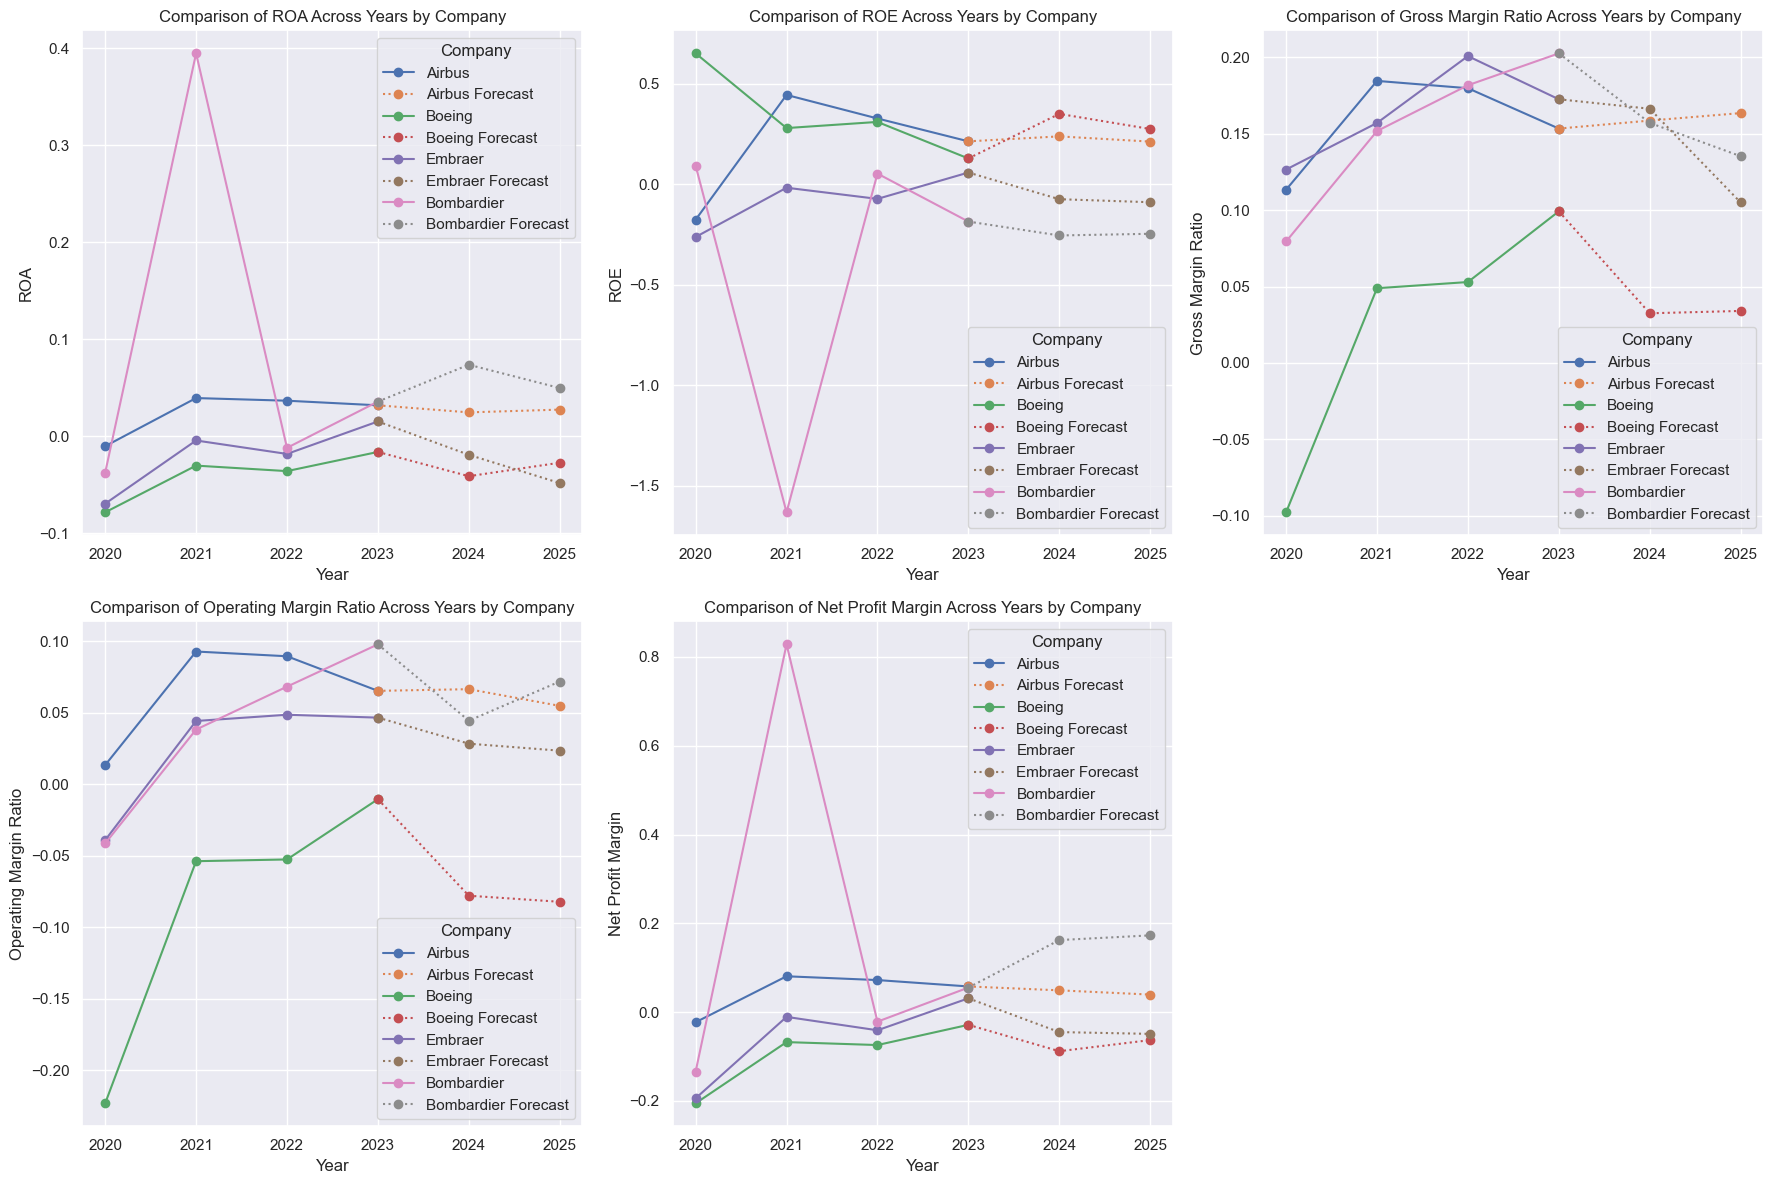

In [26]:
sns.set_theme(style='darkgrid')

plot_profitability_ratios = ['ROA', 'ROE', 'Gross Margin Ratio', 'Operating Margin Ratio', 'Net Profit Margin']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, ratio in enumerate(plot_profitability_ratios):
    for company in all_profitability_ratios['Company'].drop_duplicates():
        subset = all_profitability_ratios[all_profitability_ratios['Company'] == company]
        normal_years = subset[subset['Year'].astype(int) <= 2023]
        forecast_years = subset[subset['Year'].astype(int) >= 2023]
        axes[i].plot(normal_years['Year'], normal_years[ratio], marker='o', linestyle='-', label=f"{company}")
        if not forecast_years.empty:
            axes[i].plot(forecast_years['Year'], forecast_years[ratio], marker='o', linestyle=':', label=f"{company} Forecast")

    axes[i].set_title(f'Comparison of {ratio} Across Years by Company')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(ratio)
    axes[i].legend(title='Company')
    axes[i].grid(True)

plt.tight_layout()
if len(plot_profitability_ratios) < len(axes):
    axes[-1].axis('off')
plt.show()



2.   **Forecasted Liquidity Ratios**


In [27]:
liquidity_ratios = {}
for company, df in company_dataframes.items():
    inventory = df.get('Inventory', pd.Series([0]*df.shape[0], index=df.index))
    liquidity_ratios[company] = pd.DataFrame({
        'Current Ratio': df['Current Assets'] / df['Current Liabilities'],
        'Quick Ratio': (df['Current Assets'] - inventory) / df['Current Liabilities']
    })
    liquidity_ratios[company]['Year'] = df.index.str.split().str[-1]
    liquidity_ratios[company]['Company'] = company
    liquidity_ratios[company].reset_index(drop=True, inplace=True)


all_liquidity_ratios = pd.concat(liquidity_ratios.values())

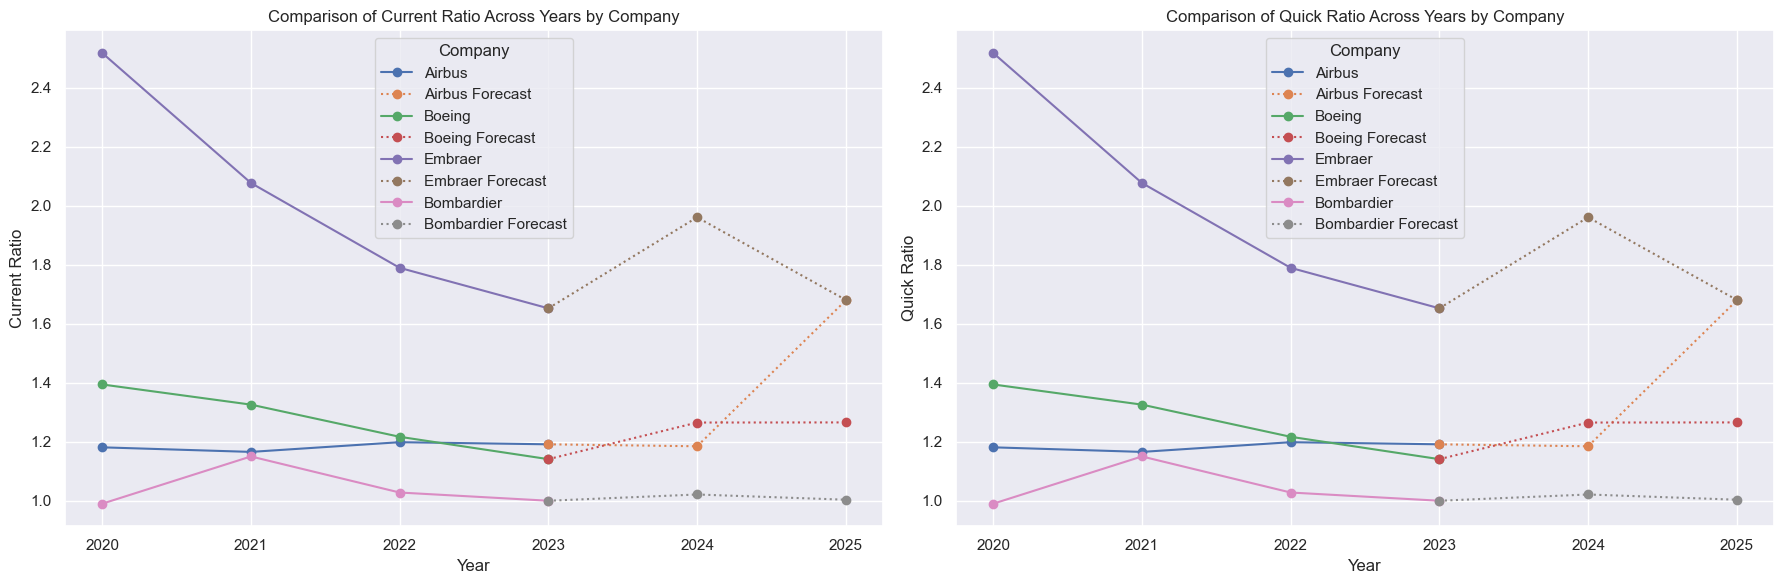

In [28]:
sns.set_theme(style='darkgrid')

plot_liquidity_ratios  = ['Current Ratio', 'Quick Ratio']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

for i, ratio in enumerate(plot_liquidity_ratios):
    for company in all_liquidity_ratios['Company'].drop_duplicates():
        subset = all_liquidity_ratios[all_liquidity_ratios['Company'] == company]
        normal_years = subset[subset['Year'].astype(int) <= 2023]
        forecast_years = subset[subset['Year'].astype(int) >= 2023]
        axes[i].plot(normal_years['Year'], normal_years[ratio], marker='o', linestyle='-', label=f"{company}")
        if not forecast_years.empty:
            axes[i].plot(forecast_years['Year'], forecast_years[ratio], marker='o', linestyle=':', label=f"{company} Forecast")

    axes[i].set_title(f'Comparison of {ratio} Across Years by Company')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(ratio)
    axes[i].legend(title='Company')
    axes[i].grid(True)

plt.tight_layout()
if len(plot_liquidity_ratios ) < len(axes):
    axes[-1].axis('off')
plt.show()


3. **Forecasted Solvency ratios**

In [29]:
solvency_ratios = {}
for company, df in company_dataframes.items():
    solvency_ratios[company] = pd.DataFrame({
        'Debt to Equity Ratio': df['Total Debt'] / df['Stockholders Equity'],
        'Debt to Assets Ratio': df['Total Debt'] / df['Total Assets']
    })
    solvency_ratios[company]['Year'] = df.index.str.split().str[-1]
    solvency_ratios[company]['Company'] = company
    solvency_ratios[company].reset_index(drop=True, inplace=True)

all_solvency_ratios = pd.concat(solvency_ratios.values())

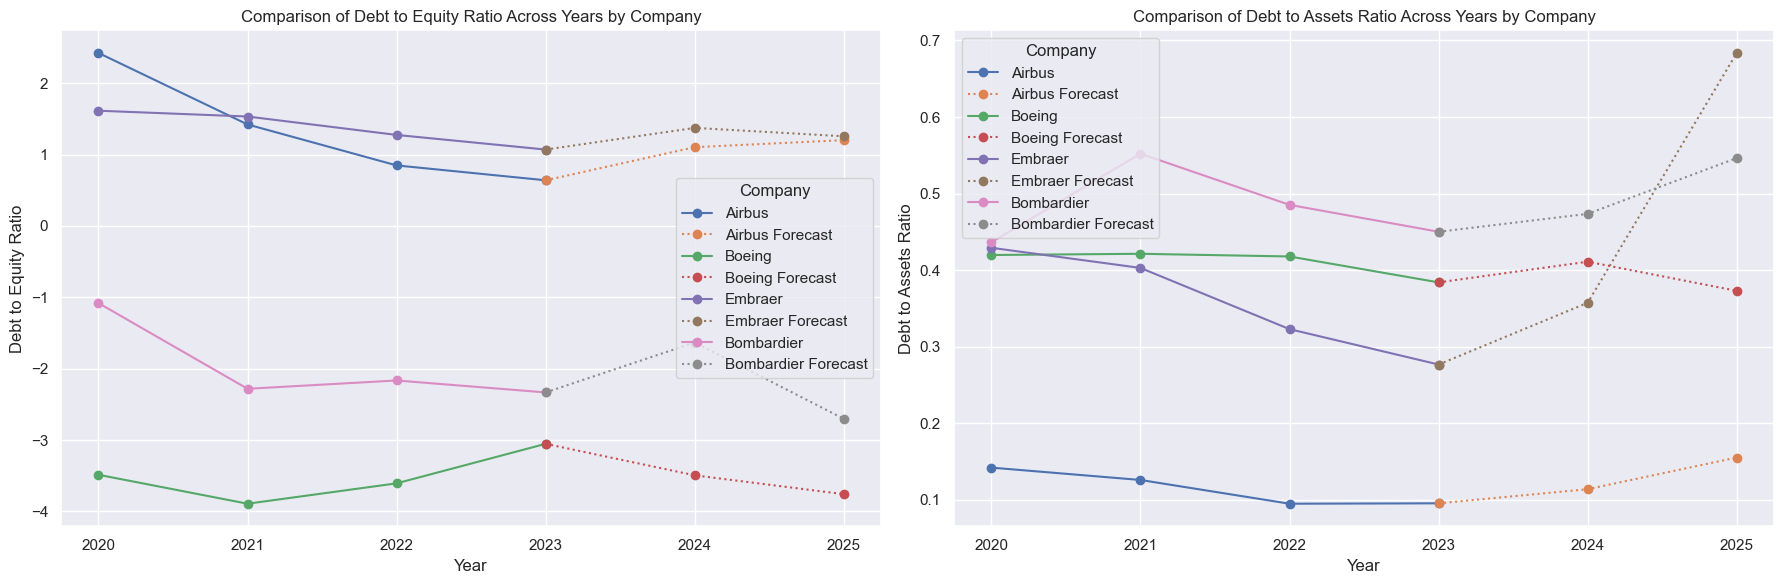

In [30]:
sns.set_theme(style='darkgrid')

plot_solvency_ratios = ['Debt to Equity Ratio', 'Debt to Assets Ratio']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

for i, ratio in enumerate(plot_solvency_ratios):
    for company in all_solvency_ratios['Company'].drop_duplicates():
        subset = all_solvency_ratios[all_solvency_ratios['Company'] == company]
        normal_years = subset[subset['Year'].astype(int) <= 2023]
        forecast_years = subset[subset['Year'].astype(int) >= 2023]
        axes[i].plot(normal_years['Year'], normal_years[ratio], marker='o', linestyle='-', label=f"{company}")
        if not forecast_years.empty:
            axes[i].plot(forecast_years['Year'], forecast_years[ratio], marker='o', linestyle=':', label=f"{company} Forecast")

    axes[i].set_title(f'Comparison of {ratio} Across Years by Company')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(ratio)
    axes[i].legend(title='Company')
    axes[i].grid(True)

plt.tight_layout()
if len(plot_solvency_ratios ) < len(axes):
    axes[-1].axis('off')
plt.show()

In conclusion, for the 2024 forecasts, we utilized the simplest method by taking the average of past ratios, which provided a straightforward prediction. For the 2025 forecasts, we added Gaussian noise to the average to introduce a degree of uncertainty into our projections, reflecting the inherent unpredictability in future trends. 

# IV. ESG Performance Analysis


To perform the ESG Analysis, an Excel Sheet has been create to store the different scores: 



*   https://www.sustainalytics.com/esg-rating/embraer-sa/1008561965
*   https://fr.finance.yahoo.com/quote/AIR.PA/sustainability
*   https://www.sustainalytics.com/esg-rating/bombardier-inc/1008573450
*   https://fr.finance.yahoo.com/quote/BA/sustainability



## A. ESG Rating Analysis


In [31]:
ESG_file= "https://raw.githubusercontent.com/adclair/ESG-Analysis/main/ESG_Sheet.xlsx"
#ESG_file=pd.read_excel(r'/ESG Sheet.xlsx')

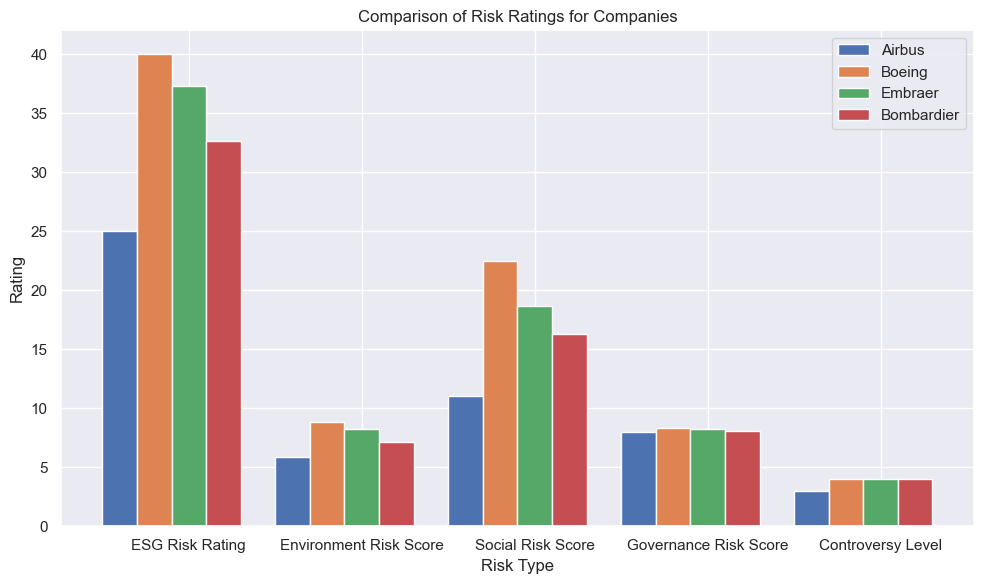

In [32]:
ESG_Ratings = pd.read_excel(ESG_file)

companies = ESG_Ratings['Company'].tolist()
risk_ratings = ESG_Ratings.drop('Company', axis=1)

bar_positions = np.arange(len(risk_ratings.columns))

bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, company in enumerate(companies):
    ax.bar(bar_positions + i * bar_width, risk_ratings.loc[ESG_Ratings['Company'] == company].values.flatten(), width=bar_width, label=company)

plt.xlabel('Risk Type')
plt.ylabel('Rating')
plt.title('Comparison of Risk Ratings for Companies')
plt.xticks(bar_positions + bar_width * len(companies) / 2, risk_ratings.columns)
plt.legend()

plt.tight_layout()
plt.show()

## B. Relationship Between ESG and Financial health

In [33]:
financial_health_df=pd.concat([Liquidity_ratios[['Company','Current Ratio','Quick Ratio']],
                                 Profitability_ratios[['ROE', 'ROA', 'Gross Margin Ratio', 'Operating Margin Ratio', 'Net Profit Margin']],
                                 Solvency_ratios[['Debt to Equity Ratio','Debt to Assets Ratio']]])

financial_health_df=financial_health_df.groupby(level=0).first()

average_ratios_by_company=financial_health_df.groupby('Company').mean()#this calculate the average
average_ratios_by_company=average_ratios_by_company.reindex(["Airbus", "Boeing", "Embraer", "Bombardier"])

To concatenate the 2 tables, we reindex the ESG rating table, by computing the same index(company) than the financial health dataframe.

In [34]:
ESG_Ratings.set_index('Company', inplace=True)
ESG_Ratings.index = ESG_Ratings.index.map(lambda x: x.strip())
print(ESG_Ratings)

            ESG Risk Rating  Environment Risk Score  Social Risk Score  \
Company                                                                  
Airbus                 25.0                   5.900              11.00   
Boeing                 40.0                   8.800              22.50   
Embraer                37.3                   8.206              18.65   
Bombardier             32.6                   7.172              16.30   

            Governance Risk Score  Controversy Level  
Company                                               
Airbus                      8.000                  3  
Boeing                      8.300                  4  
Embraer                     8.206                  4  
Bombardier                  8.100                  4  


### Correlation Matrix :

In [35]:
correlation_data=pd.concat([average_ratios_by_company,ESG_Ratings])
correlation_data = correlation_data.groupby(level=0).first()

We use Seaborn to plot the headmap correlation matrix for a better visibility

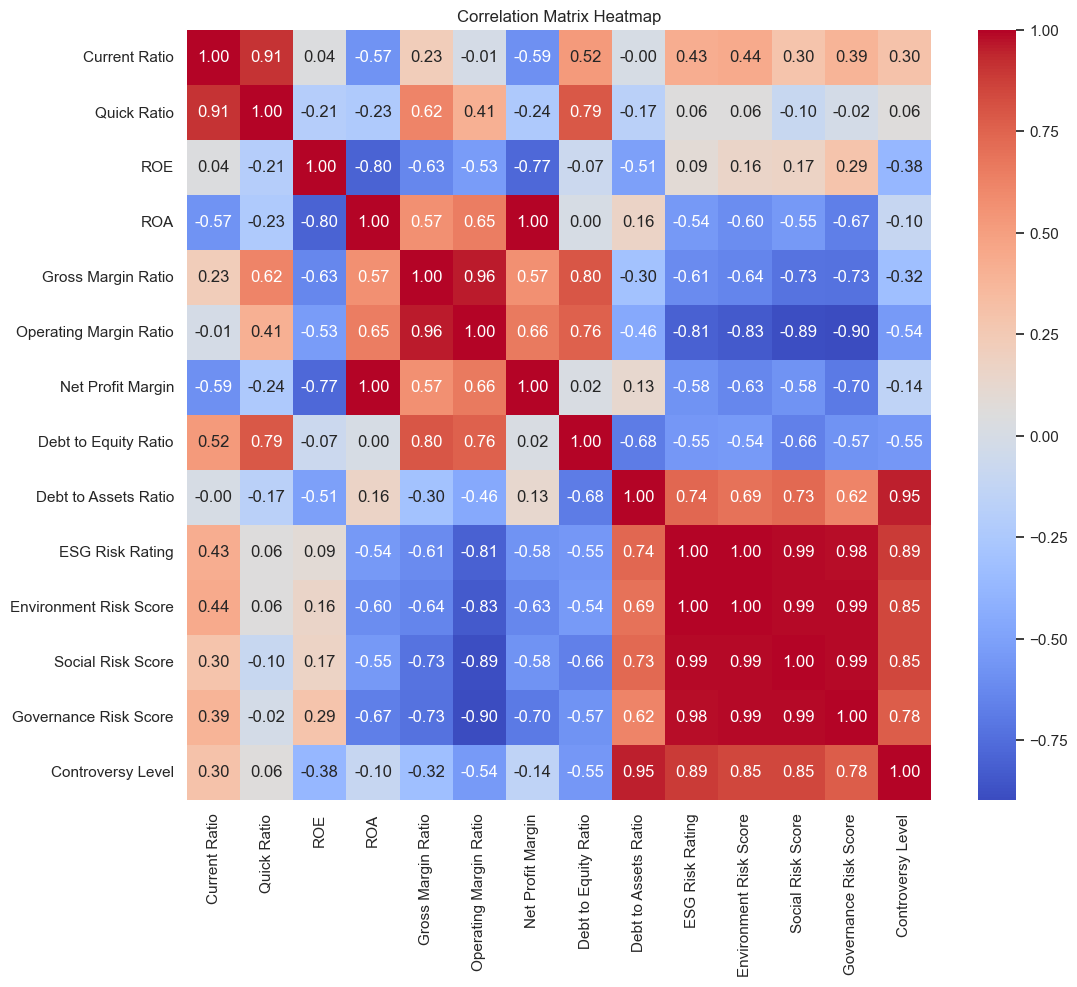

In [36]:
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Except, the ESG Square that is red (normal because ESG= E + S + G) , we can observe a negative correlation between ESG Risk Rating and Profitability Ratio. This is because profit is positively correlated with bad ESG rates (the more profit a company makes, especially in the aerospace industry, due to increasing flights, etc.), the worse the ESG risk rating becomes.